# Métodos de Diferenças Finitas para Problemas de Valor Inicial e de Contorno

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import math
from pylab import arange
import pandas as pd
import numpy as np

## Problema de valor inicial associado a lei de resfriamento de Newton:

$$\begin{cases}
 \dfrac{d \theta}{d t} = -K(\theta - \theta_m)\\ 
\theta(0) = \theta_0
\end{cases}, 
\quad t\in [0,T]$$

In [2]:
# Constantes passadas no exercicio
K = 0.035871952
teta0 = 99
tetaM = 27
deltaT = 1
intervalo = arange(deltaT,50,deltaT)

# Valores iniciais
y_analitica = [99]
y_explicito = [99]
y_implicito = [99]
y_CN = [99]
y_DC = [99]

In [3]:
# valor de 1/k e 2/k
print(1/K)
print(2/K)

27.876932930775556
55.75386586155111


## Métodos para problemas de valores iniciais:

### Analítica: $$\theta(t) = (\theta_0-\theta_m)e^{-Kt} + \theta_m$$

In [29]:
def analitica(teta0, tetaM, K, t):
    return tetaM + (teta0-tetaM)*math.exp(-K*t)

### Euler Explícito: $$\theta^{n+1} = (1-k\Delta t)\theta^n + k\Delta t \theta_m$$

Como o valor de $\Delta t$ para o caso do método explicito deve seguir a condição de estabilidade $\Delta t = \frac{1}{a}$, e o valor de $a = k$, então para esse caso foi escolhido $\Delta t = 1 < \frac{1}{K} = 27.87693$

In [30]:
def euler_explicita(tetaN, deltaT, K, tetaM):
    return deltaT*K*tetaM + (1-K*deltaT)*tetaN

### Euler Implícito: $$\theta^{n+1} = \frac{1}{1-k\Delta t}(\theta_n + k\Delta t\theta_m)$$

Como o método implícito é incondicionalmente estável foi utilizado o mesmo $\Delta t$ do método explícito

In [31]:
def euler_implicita(tetaN, deltaT, K, tetaM):
    return (deltaT*K*tetaM + tetaN)/(1+K*deltaT)

### Método Crank-Nicolson: $$\theta^{n+1} = \frac{1}{2+k\Delta t}(\theta^n(2-k\Delta t) + 2k\Delta t\theta_m)$$

Como o valor de $\Delta t$ para o caso do método Crank-Nicolson deve seguir a condição de estabilidade $\Delta t = \frac{2}{a}$, e o valor de $a = k$, então para esse caso foi escolhido $\Delta t = 1 < \frac{2}{K} = 55.75387$

In [32]:
def crank_nicolson(tetaN, deltaT, K, tetaM):
    return (1/(2+K*deltaT))*(tetaN*(2-K*deltaT)+2*K*deltaT*tetaM)

### Método de Diferença Central: $$\theta^{n+1} = -2\Delta tK(\theta^{n}-\theta_m) + \theta^{n-1}$$

In [33]:
def diferenca_central(tetaN, tetaN_1, deltaT, K, tetaM):
    return -2*deltaT*K*(tetaN-tetaM) + tetaN_1

## Aplicando métodos com precisão simples:

In [63]:
# Solução analitica
y_analitica = [np.float32(analitica(teta0, tetaM, K, x)) for x in arange(0,50, deltaT)] 

# Método Explícito
for i in intervalo:
    y_explicito.append(np.float32(euler_explicita(y_explicito[-1], deltaT, K, tetaM)))
    
# Método Implícito
for i in intervalo:
    y_implicito.append(np.float32(euler_implicita(y_implicito[-1], deltaT, K, tetaM)))
    
# Método Crank-Nicolson
for i in intervalo:
    y_CN.append(np.float32(crank_nicolson(y_CN[-1], deltaT, K, tetaM)))
    
# Método de Diferença Central
y_DC.append(y_implicito[1])
for i in arange(deltaT*2,50,deltaT):
    y_DC.append(np.float32(diferenca_central(y_DC[-1], y_DC[-2], deltaT, K, tetaM)))


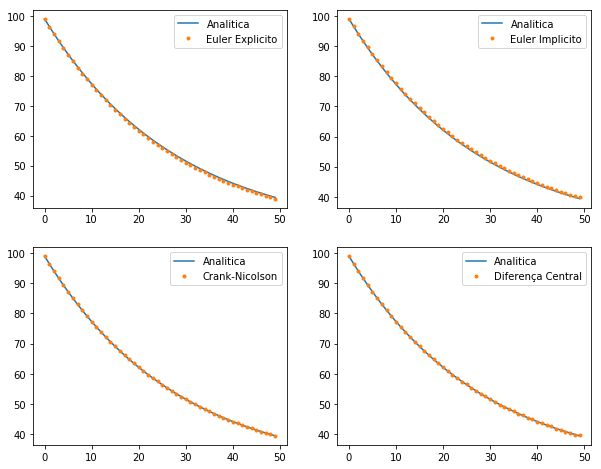

In [64]:
fig = plt.figure(figsize=(10,8))
plt.subplot(221)
plt.plot(arange(0,50,deltaT), y_analitica, label='Analitica')
plt.plot(arange(0,50,deltaT), y_explicito, 'o', linewidth=2, markersize=3,label='Euler Explicito')#, marker='o', markevery=[0,10,20,30,40])
plt.legend()

plt.subplot(222)
plt.plot(arange(0,50,deltaT), y_analitica, label='Analitica')
plt.plot(arange(0,50,deltaT), y_implicito, 'o', linewidth=2, markersize=3,label='Euler Implicito')#, marker='^', markevery=[5,15,25,35,45])
plt.legend()

plt.subplot(223)
plt.plot(arange(0,50,deltaT), y_analitica, label='Analitica')
plt.plot(arange(0,50,deltaT), y_CN, 'o', linewidth=2, markersize=3,label='Crank-Nicolson')#, marker='>', markevery=[3,13,23,33,43])
plt.legend()

plt.subplot(224)
plt.plot(arange(0,50,deltaT), y_analitica, label='Analitica')
plt.plot(arange(0,50,deltaT), y_DC, 'o', linewidth=2, markersize=3,label='Diferença Central')#, marker='s', markevery=[7,17,27,37,47])
plt.legend()
plt.savefig('pvi_float32.png')

### Obtendo taxa de convergência dos métodos:

In [2]:
def norma_max(analitica, estimado):
    max = abs(analitica[0] - estimado[0])
    for (real, est) in zip(analitica, estimado):
        erro = abs(real - est)
        if erro > max: max = erro
    return max

In [12]:
erro_max_exp = norma_max(y_analitica, y_explicito)
erro_max_im = norma_max(y_analitica, y_implicito)
erro_max_cn = norma_max(y_analitica, y_CN)
erro_max_dc = norma_max(y_analitica, y_DC)

print('Norma Max Explicito: '+str(erro_max_exp))
print('Norma Max Implicito: '+str(erro_max_im))
print('Norma Max Crank-Nicolson: '+str(erro_max_cn))
print('Norma Max Diferenca Central: '+str(erro_max_dc))

Norma Max Explicito: 0.4822731
Norma Max Implicito: 0.46810532
Norma Max Crank-Nicolson: 0.0028381348
Norma Max Diferenca Central: 0.13329697


## Aplicando métodos com precisão dupla:

In [65]:
# Valores iniciais
y_analitica = [99]
y_explicito = [99]
y_implicito = [99]
y_CN = [99]
y_DC = [99]

# Solução analitica
y_analitica = [np.float64(analitica(teta0, tetaM, K, x)) for x in arange(0,50, deltaT)] 

# Método Explícito
for i in intervalo:
    y_explicito.append(np.float64(euler_explicita(y_explicito[-1], deltaT, K, tetaM)))
    
# Método Implícito
for i in intervalo:
    y_implicito.append(np.float64(euler_implicita(y_implicito[-1], deltaT, K, tetaM)))
    
# Método Crank-Nicolson
for i in intervalo:
    y_CN.append(np.float64(crank_nicolson(y_CN[-1], deltaT, K, tetaM)))
    
# Método de Diferença Central
y_DC.append(y_implicito[1])
for i in arange(deltaT*2,50,deltaT):
    y_DC.append(np.float64(diferenca_central(y_DC[-1], y_DC[-2], deltaT, K, tetaM)))


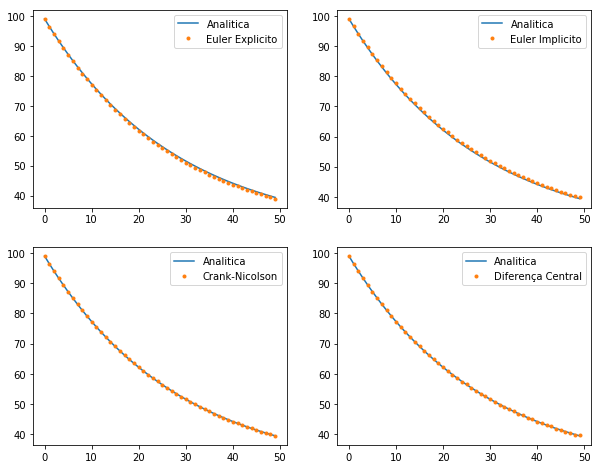

In [66]:
fig = plt.figure(figsize=(10,8))
plt.subplot(221)
plt.plot(arange(0,50,deltaT), y_analitica, label='Analitica')
plt.plot(arange(0,50,deltaT), y_explicito, 'o', linewidth=2, markersize=3,label='Euler Explicito')#, marker='o', markevery=[0,10,20,30,40])
plt.legend()

plt.subplot(222)
plt.plot(arange(0,50,deltaT), y_analitica, label='Analitica')
plt.plot(arange(0,50,deltaT), y_implicito, 'o', linewidth=2, markersize=3,label='Euler Implicito')#, marker='^', markevery=[5,15,25,35,45])
plt.legend()

plt.subplot(223)
plt.plot(arange(0,50,deltaT), y_analitica, label='Analitica')
plt.plot(arange(0,50,deltaT), y_CN, 'o', linewidth=2, markersize=3,label='Crank-Nicolson')#, marker='>', markevery=[3,13,23,33,43])
plt.legend()

plt.subplot(224)
plt.plot(arange(0,50,deltaT), y_analitica, label='Analitica')
plt.plot(arange(0,50,deltaT), y_DC, 'o', linewidth=2, markersize=3,label='Diferença Central')#, marker='s', markevery=[7,17,27,37,47])
plt.legend()
plt.savefig('pvi_float64.png')

### Obtendo taxa de convergência dos métodos:

In [15]:
erro_max_exp = norma_max(y_analitica, y_explicito)
erro_max_im = norma_max(y_analitica, y_implicito)
erro_max_cn = norma_max(y_analitica, y_CN)
erro_max_dc = norma_max(y_analitica, y_DC)

print('Norma Max Explicito: '+str(erro_max_exp))
print('Norma Max Implicito: '+str(erro_max_im))
print('Norma Max Crank-Nicolson: '+str(erro_max_cn))
print('Norma Max Diferenca Central: '+str(erro_max_dc))

Norma Max Explicito: 0.48228251731091376
Norma Max Implicito: 0.46811359379604767
Norma Max Crank-Nicolson: 0.00284068458430653
Norma Max Diferenca Central: 0.13333251490002596


Assim pode ser visto que há um diferença entre utilizar variáveis de simples ou dupla precisão, o que resultam em valores maiores para a norma de erro maximo na analise com dupla precisão.

## Problemas de valor de contorno:

$$\begin{align} \label{prob1}
- \varepsilon\dfrac{d^2 u}{d x^2} + u &= 1, \quad x\in \Omega= [0,1]
 \\ \label{cc1}
 u(0)&=u(1)=0.
\end{align}$$

### Analítica:
$$\begin{equation}\label{solexat1}
u(x) = c_1 e^{-\tfrac{x}{\sqrt{\varepsilon}}} + c_2 e^{\tfrac{x}{\sqrt{\varepsilon}}}+1
\end{equation}$$ onde $c_1 = -1-c_2$ e $c_2 = \dfrac{e^{-\tfrac{1}{\sqrt{\varepsilon}}}-1}
{e^{\tfrac{1}{\sqrt{\varepsilon}}}-e^{-\tfrac{1}{\sqrt{\varepsilon}}}}$.

In [7]:
def c2(epsilon):
    return (math.exp(-1/math.sqrt(epsilon)) - 1)/(math.exp(1/math.sqrt(epsilon)) - math.exp(-1/math.sqrt(epsilon)))

def c1(epsilon,c2):
    return -1-c2(epsilon)

def analitica_PVC(x,epsilon,c1,c2):
    return c1(epsilon,c2) * math.exp(-x/math.sqrt(epsilon)) + c2(epsilon)* math.exp(x/math.sqrt(epsilon)) + 1

### Discretização: $$-u_{j+1} + u_j(2+\frac{h^{2}}{\varepsilon})-u_{j-1} = \frac{h^{2}}{\varepsilon}$$

In [4]:
# Constantes
epsilon = [0.1, 0.01, 0.001, 0.0001]
n = [4,16,64,256,1024]

In [5]:
def TDMASolve(a, b, c, d):
    ''' Resolve Ax = d onde A é uma matriz tridiagonal composta pelos vetores a, b, c
    a - subdiagonal
    b - diagonal principal
    c - superdiagonal
    Retorna x
    '''
    # print('diagonais: ', a, b, d, c)
    n = len(d) # len(d) == len(b)
    c_ = [ c[0] / b[0] ]
    d_ = [ d[0] / b[0] ]
    
    for i in range(1, n):
        aux = b[i] - c_[i-1]*a[i-1]
        if i < n-1:
            c_.append( c[i] / aux )
        d_.append( (d[i] - d_[i-1]*a[i-1])/aux )
    
    # Substituição de volta
    x = [d_[-1]]
    for i in range(n-2, -1, -1):
        x = [ d_[i] - c_[i]*x[0] ] + x
    
    return x

In [6]:
def discretizacao_PVC(h,epsilon):
    return ((h ** 2)/ epsilon)

## Aplicando métodos com precisão simples:

In [93]:
y_eps = []
y_analitica = []

h = 1/500


for e in epsilon:
    fx = []
    a = c =[-1]*len(np.arange(0,1,h))
    b = [2+(h**2)/e]*len(np.arange(0,1+h,h))
    
    y_analitica.append([np.float32(analitica_PVC(x,e,c1,c2)) for x in arange(0,1+h, h)])
    
    # Adquirindo valores do termo dependente
    for i in arange(h,1,h):
        fx.append(np.float32(discretizacao_PVC(h, e)))
            
    # Adquirindo valores a partir do algoritmo de thomas
    y_disc = TDMASolve(a,b,c,fx)
    # Inserindo valor inicial e final
    y_disc.insert(0,0)
    y_disc.append(0)
    
    y_eps.append(y_disc)

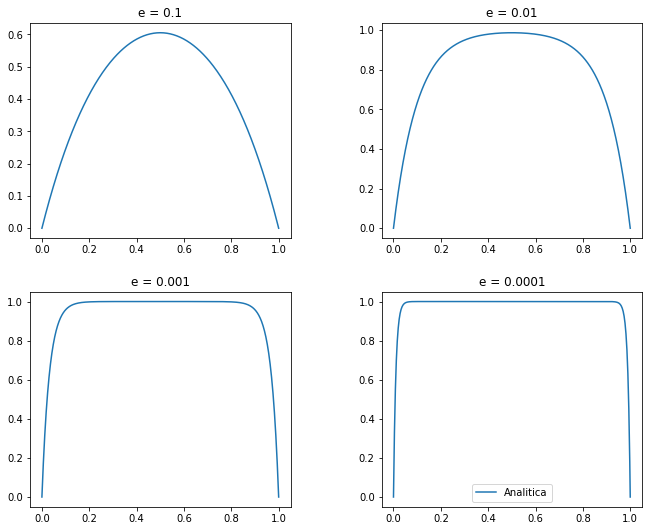

In [97]:
fig = plt.figure(figsize=(10, 8))
ind = 0

for i in range(4):
    plt.subplot(221+i)
    plt.plot(arange(0,1+h, h), y_analitica[i], label='Analitica')#, marker='^', markevery=range(0,500,80))
    plt.plot(arange(0,1+h, h), y_eps[i],label='Discretização', marker='o')
    plt.title('e = '+str(epsilon[i]))


plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.25, wspace=0.35)
plt.legend()
# plt.show()
plt.savefig('pvc_h.png')

e = 0.1 error=
[-4.256296, -6.980084, -9.749442, -12.514645, -15.172065]
e = 0.01 error=
[-3.1642122, -5.1739297, -7.8926373, -10.660684, -13.416885]
e = 0.001 error=
[-4.190238, -3.3269675, -5.610099, -8.36206, -11.13148]
e = 0.0001 error=
[-6.4409413, -3.7970393, -3.565423, -6.0846004, -8.831635]


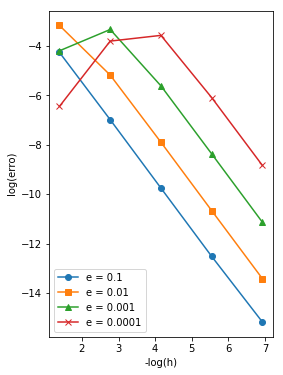

In [83]:
mark = ['o','s','^','x']
ind = 0
fig = plt.figure(figsize=(4, 6))

x_log = [-np.log(1/x) for x in n]

for e in epsilon:
    erros = []
    for num in n:
        
        h = 1/num
        d = []
        a = c =[-1]*len(np.arange(0,1,h))
        b = [2+(h**2)/e]*len(np.arange(0,1+h,h))


        y_analitica = [np.float32(analitica_PVC(x,e,c1,c2)) for x in arange(0,1, h)]

        for i in arange(h,1,h):
            d.append(np.float32(discretizacao_PVC(h, e)))
            
        y_disc = TDMASolve(a,b,c,d)
        y_disc.append(0)
        y_disc.insert(0,0)
                
        erros.append(np.float32(np.log(norma_max(y_analitica,y_disc))))
        
    plt.plot(x_log,erros,label='e = '+str(e),marker=mark[ind])
    print('e = '+str(e)+' error=')
    print(erros)
    ind+=1

plt.ylabel('log(erro)')
plt.xlabel('-log(h)')
plt.legend()
plt.savefig('erro_pvc_32.png', bbox_inches='tight')

In [85]:
y_analitica[-1]

0.09303938

## Aplicando métodos com precisão dupla:

In [80]:
y_eps = []
y_analitica = []

h = 0.1


for e in epsilon:
    fx = []
    a = c =[-1]*len(np.arange(0,1,h))
    b = [2+(h**2)/e]*len(np.arange(0,1+h,h))
    
    y_analitica.append([np.float64(analitica_PVC(x,e,c1,c2)) for x in arange(0,1+h, h)])
    
    # Adquirindo valores do termo dependente
    for i in arange(h,1,h):
        fx.append(np.float64(discretizacao_PVC(h, e)))
            
    # Adquirindo valores a partir do algoritmo de thomas
    y_disc = TDMASolve(a,b,c,fx)
    # Inserindo valor inicial e final
    y_disc.insert(0,0)
    y_disc.append(0)
    
    y_eps.append(y_disc)

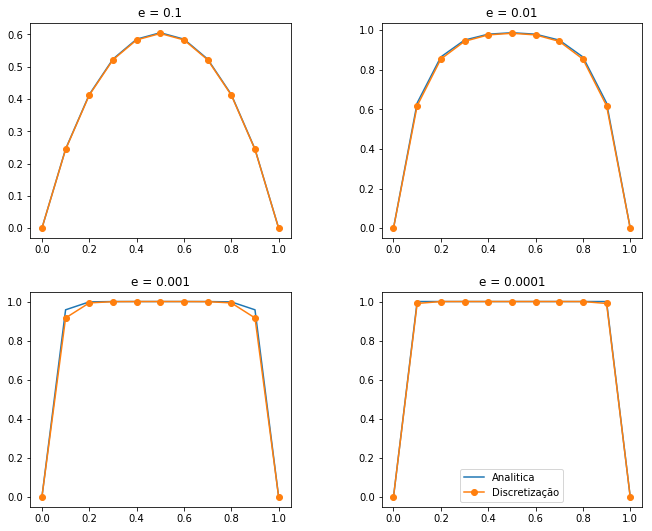

In [81]:
fig = plt.figure(figsize=(10, 8))
ind = 0

for i in range(4):
    plt.subplot(221+i)
    plt.plot(arange(0,1+h, h), y_analitica[i], label='Analitica')#, marker='^', markevery=range(0,500,80))
    plt.plot(arange(0,1+h, h), y_eps[i],label='Discretização', marker='o')
    plt.title('e = '+str(epsilon[i]))


plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.25, wspace=0.35)
plt.legend()
# plt.show()
plt.savefig('pvc_h_64.png')

e = 0.1 error=
[-4.256295744951823, -6.98007872657057, -9.74946245331659, -12.5218502104415, -15.294426215482975]
e = 0.01 error=
[-3.164212243636987, -5.173930373252737, -7.892614891599767, -10.660932291997732, -13.433318266168733]
e = 0.001 error=
[-4.1902370829760756, -3.32696722331869, -5.610102996888635, -8.362124044425347, -11.133399836339928]
e = 0.0001 error=
[-6.440941461938964, -3.7970382600778474, -3.56542195384637, -6.0846020067157705, -8.831814210021085]


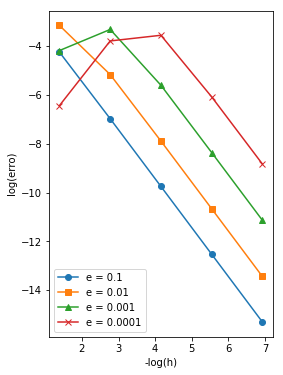

In [82]:
mark = ['o','s','^','x']
ind = 0
fig = plt.figure(figsize=(4, 6))

x_log = [-np.log(1/x) for x in n]

for e in epsilon:
    erros = []
    for num in n:
        
        h = 1/num
        d = []
        a = c =[-1]*len(np.arange(0,1,h))
        b = [2+(h**2)/e]*len(np.arange(0,1+h,h))


        y_analitica = [np.float64(analitica_PVC(x,e,c1,c2)) for x in arange(0,1, h)]

        for i in arange(h,1,h):
            d.append(np.float64(discretizacao_PVC(h, e)))
            
        y_disc = TDMASolve(a,b,c,d)
        y_disc.append(0)
        y_disc.insert(0,0)
                
        erros.append(np.log(norma_max(y_analitica,y_disc)))
        
    plt.plot(x_log,erros,label='e = '+str(e),marker=mark[ind])
    print('e = '+str(e)+' error=')
    print(erros)
    ind+=1

plt.ylabel('log(erro)')
plt.xlabel('-log(h)')
plt.legend()
plt.savefig('erro_pvc_64.png', bbox_inches='tight')